## Assignment

Import necessary library

In [ ]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Read the data

In [ ]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

Drop unnecessary columns

In [ ]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


Rename columns title

In [ ]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

Add a 'Total' column

In [ ]:
df_can['Total'] = df_can.sum(axis=1)

<ipython-input-36-8cd345a76c6e>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


**Question 1:** Let's compare the number of immigrants from India and China from 1980 to 2013.


Step 1: Get the data set for China and India, and display dataframe.

In [ ]:
### need a few adjustment before proceeding to the first step
# describe the data #
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


In [ ]:
# filter the list of countries #
df_can.Country
df_can.loc[:, ['Country', 1980, 1981, 1982, 1983, 1984, 1985]]

,Country,1980,1981,1982,1983,1984,1985
0,Afghanistan,16,39,39,47,71,340
1,Albania,1,0,0,0,0,0
2,Algeria,80,67,71,69,63,44
3,American Samoa,0,1,0,0,0,0
4,Andorra,0,0,0,0,0,0
...,...,...,...,...,...,...,...
190,Viet Nam,1191,1829,2162,3404,7583,5907
191,Western Sahara,0,0,0,0,0,0
192,Yemen,1,2,1,6,0,18
193,Zambia,11,17,11,7,16,9


In [ ]:
# the index is in numeric (0-194), change to string for easier search #
df_can = df_can.set_index('Country').rename_axis(None)
df_can.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [ ]:
# converting column names into string #
df_can.columns = [str(col) for col in df_can.columns]

In [ ]:
# plotting years as string #
years = [str(year) for year in range(1980, 2014)]
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [ ]:
# import matplotlib for the plot #
import matplotlib.pyplot as plt

In [ ]:
### type your answer here
# get the dataset for china and india #
df = df_can.loc[['India','China']]
df = df[years].transpose()

Step 2: Plot graph. We will explicitly specify line plot by passing in `kind` parameter to `plot()`.

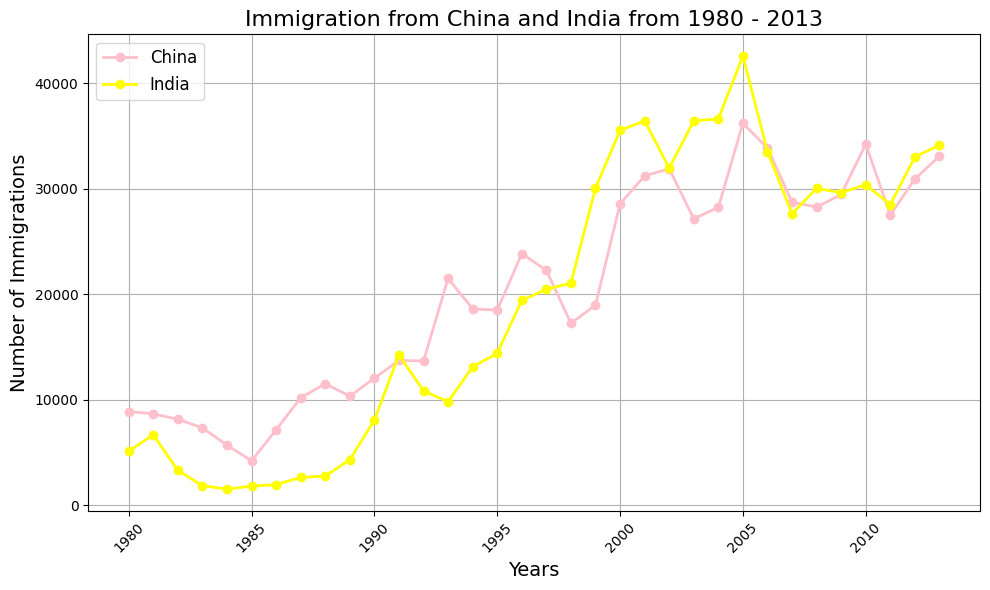

In [ ]:
### type your answer here
df.index = df.index.astype(int)
# plot the df #
df.plot(kind='line', figsize=(10, 6), linewidth=2, marker='o', color=['pink', 'yellow'])
# customize plot #
plt.title('Immigration from China and India from 1980 - 2013', fontsize=16)
plt.ylabel('Number of Immigrations', fontsize=14)
plt.xlabel('Years', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(['China', 'India'], loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

**Question 2:** Compare the trend of top 5 countries that contributed the most to immigration to Canada.

Step 1: Get the data set for top 5 countries

In [ ]:
### type your answer here
# sort the df by the 'Total' column in descending order #
df_top5 = df_can.sort_values(by='Total', ascending=False).head(5)
df_top5 = df_top5[years].T
print(df_top5)

      India  China  United Kingdom of Great Britain and Northern Ireland  \
1980   8880   5123                                              22045      
1981   8670   6682                                              24796      
1982   8147   3308                                              20620      
1983   7338   1863                                              10015      
1984   5704   1527                                              10170      
1985   4211   1816                                               9564      
1986   7150   1960                                               9470      
1987  10189   2643                                              21337      
1988  11522   2758                                              27359      
1989  10343   4323                                              23795      
1990  12041   8076                                              31668      
1991  13734  14255                                              23380      
1992  13673 

Step 2: Plot graph

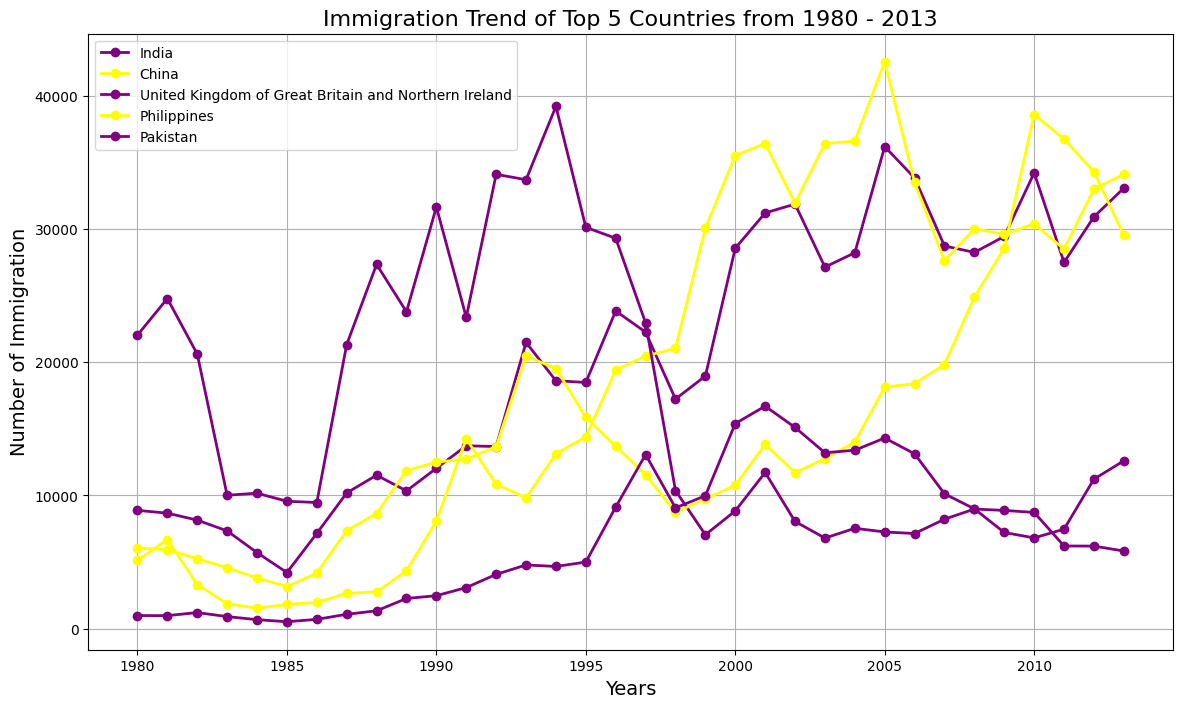

In [ ]:
### type your answer here
df_top5.index = df_top5.index.astype(int)
# plot the df #
df_top5.plot(kind='line', figsize=(14, 8), linewidth=2, marker='o', color=['purple', 'yellow'])
# customize the plot #
plt.title('Immigration Trend of Top 5 Countries from 1980 - 2013', fontsize=16)
plt.ylabel('Number of Immigration', fontsize=14)
plt.xlabel('Years', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

**Question 3**: Create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada **from** 1980 to 2013. Use a transparency value of 0.55.

In [ ]:
# sort the df and get the top 5 #
df_top5 = df_can.nlargest(5, 'Total')
df_top5 = df_top5[years].transpose()
print(df_top5.head())

      India  China  United Kingdom of Great Britain and Northern Ireland  \
1980   8880   5123                                              22045      
1981   8670   6682                                              24796      
1982   8147   3308                                              20620      
1983   7338   1863                                              10015      
1984   5704   1527                                              10170      

      Philippines  Pakistan  
1980         6051       978  
1981         5921       972  
1982         5249      1201  
1983         4562       900  
1984         3801       668  


In [ ]:
# sort the df and get 5 entries #
df_least5 = df_can.nsmallest(5, 'Total')
df_least5 = df_least5[years].transpose()
print(df_least5.head())

      Palau  Marshall Islands  Western Sahara  New Caledonia  San Marino
1980      0                 0               0              0           1
1981      0                 0               0              0           0
1982      0                 0               0              0           0
1983      0                 0               0              0           0
1984      0                 0               0              0           0


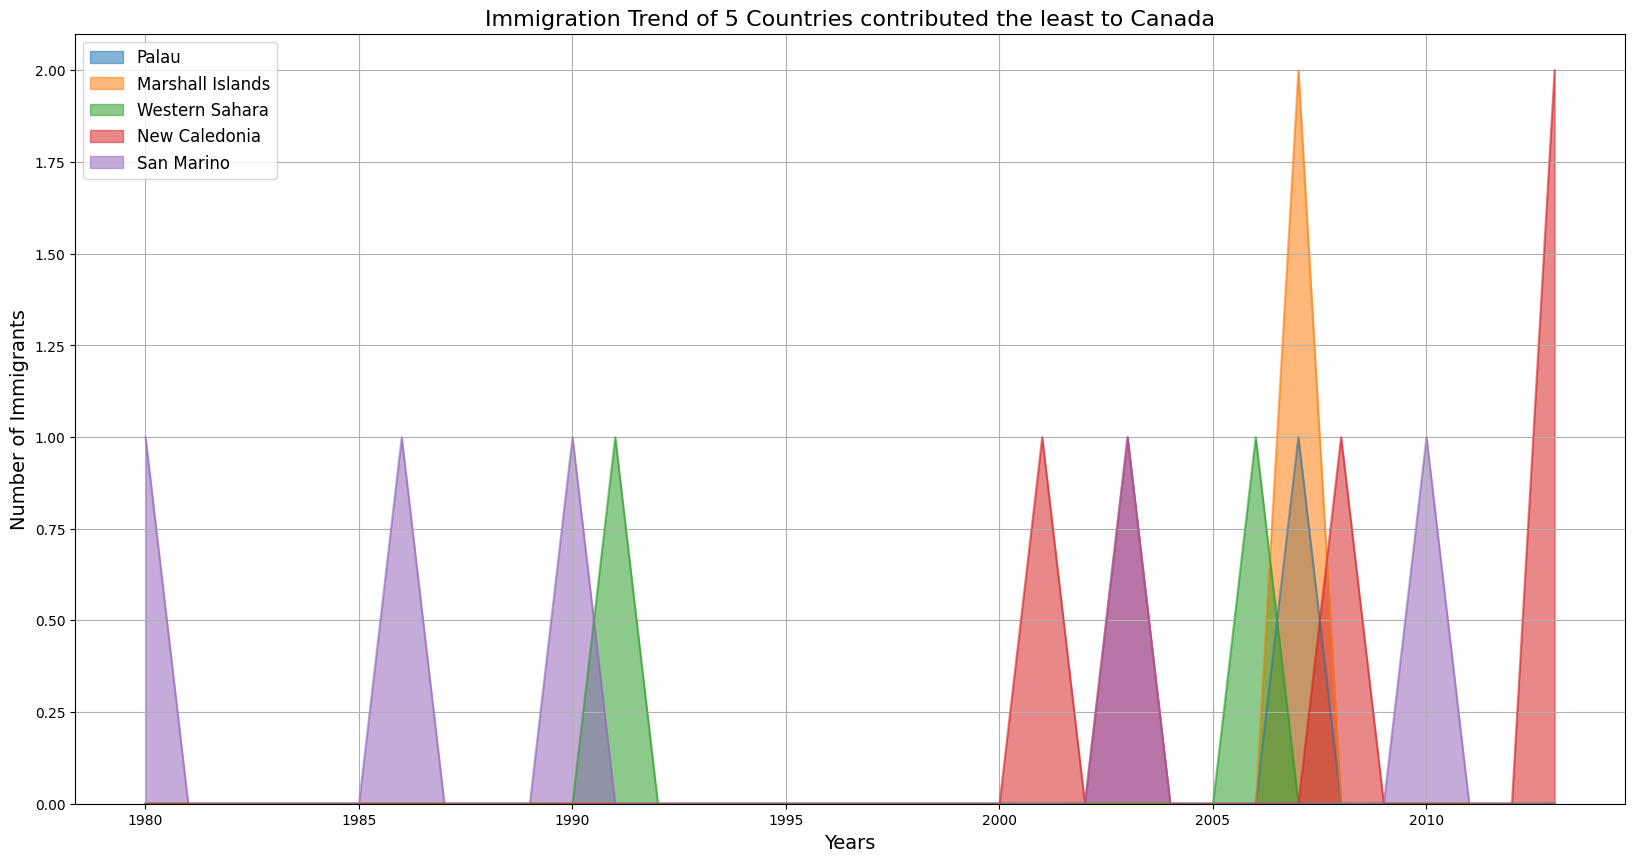

In [ ]:
### type your answer here
# plot the df #
ax = df_least5.plot(kind='area', stacked=False, alpha=0.55, figsize=(20, 10))
ax.set_title('Immigration Trend of 5 Countries contributed the least to Canada', fontsize=16)
ax.set_ylabel('Number of Immigrants', fontsize=14)
ax.set_xlabel('Years', fontsize=14)
ax.legend(fontsize=12)
ax.grid(True)
plt.show()

**Question 4**: Display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

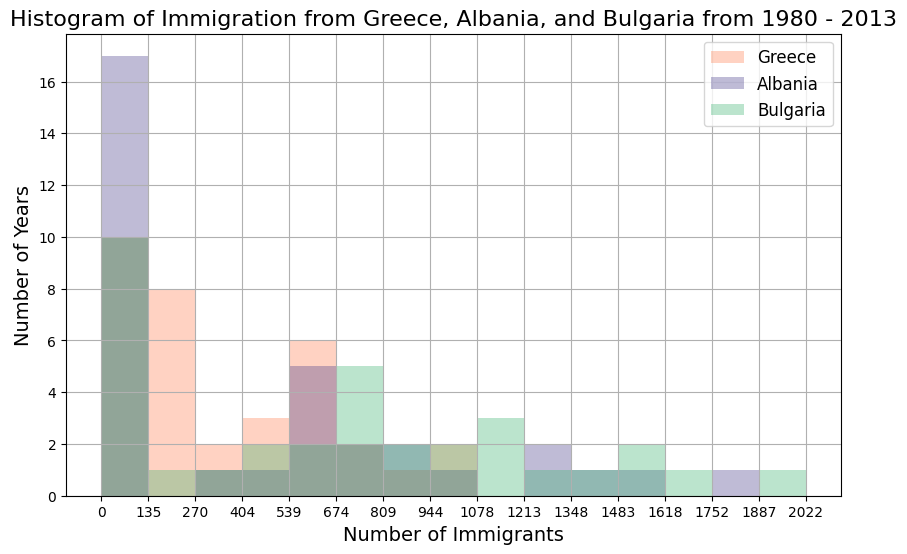

In [ ]:
### type your answer here
df_cof = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years].transpose()
ax = df_cof.plot(kind='hist',
                  figsize=(10, 6),
                  bins=15,
                  alpha=0.35,
                  color=['coral', 'darkslateblue', 'mediumseagreen'])
ax.set_title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013', fontsize=16)
ax.set_ylabel('Number of Years', fontsize=14)
ax.set_xlabel('Number of Immigrants', fontsize=14)
ax.set_xticks(bin_edges)
ax.legend(['Greece', 'Albania', 'Bulgaria'], fontsize=12)
ax.grid(True)
plt.show()

**Question 5:** Create a *horizontal* bar plot showing the *total* number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

Step 1: Get the data pertaining to the top 15 countries.

In [ ]:
### type your answer here
df_can.sort_values(by='Total', ascending=True, inplace=True)
# get top 15 #
df_top15 = df_can.tail(15)['Total']
print(df_top15)

Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64


Step 2: Plot data:
   1. Use `kind='barh'` to generate a bar chart with horizontal bars.
   2. Make sure to choose a good size for the plot and to label your axes and to give the plot a title.
<!--    3. Loop through the countries and annotate the immigrant population using the anotate function of the scripting interface. -->

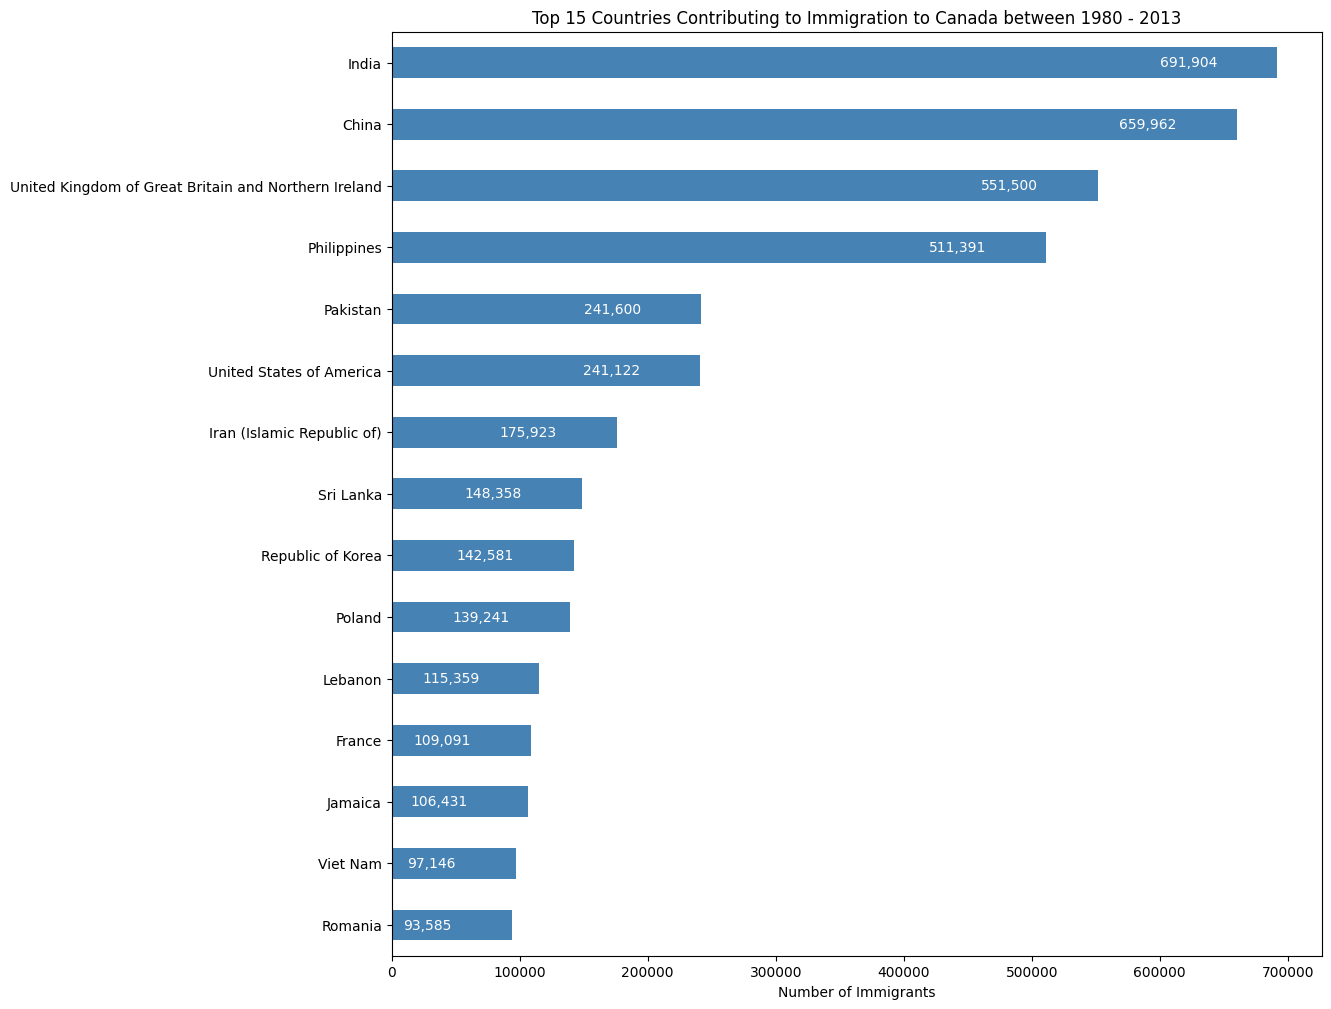

In [ ]:
### type your answer here
ax = df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
# set labels and title #
ax.set_xlabel('Number of Immigrants')
ax.set_title('Top 15 Countries Contributing to Immigration to Canada between 1980 - 2013')
for index, value in enumerate(df_top15):
    label = format(int(value), ',')
    ax.text(value - 47000, index, label, color='white', ha='right', va='center')
plt.show()

# Thank you for completing this lab!

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).